In [7]:
import numpy as np
import sys
import yaml
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import math
import pandas as pd
import mplhep as hep
sys.path.append('../utils')
from fast_analysis_utils import ExtractFromYaml

hep.style.use("ALICE")

In [8]:
def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

In [10]:
BrJpsiToMuMu =  0.05961
deltaY = 1.5

# Standard association
luminosityStdAssoc = 3162.67 #nb-1
dfJpsiRawYieldStdAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC24_pass1_skimmed/cross_section_std_assoc/LHC24aj/systematic_sig_Jpsi.txt', sep=' ')
ptMinStdAssoc = dfJpsiRawYieldStdAssocVsPt["x_min"]
ptMaxStdAssoc = dfJpsiRawYieldStdAssocVsPt["x_max"]
ptStdAssoc = (ptMinStdAssoc + ptMaxStdAssoc) / 2.
errPtStdAssoc = (ptMaxStdAssoc - ptMinStdAssoc) / 2.
rawYieldStdAssocVsPt = dfJpsiRawYieldStdAssocVsPt["val"] / (2 * errPtStdAssoc * deltaY)
statRawYieldStdAssocVsPt = dfJpsiRawYieldStdAssocVsPt["stat"] / (2 * errPtStdAssoc * deltaY)
systRawYieldStdAssocVsPt = dfJpsiRawYieldStdAssocVsPt["syst"] / (2 * errPtStdAssoc * deltaY)

dfJpsiAxeStdAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/axe_jpsi_std_assoc.txt', sep=' ')
axeStdAssocVsPt = dfJpsiAxeStdAssocVsPt["val"]
statAxeStdAssocVsPt = dfJpsiAxeStdAssocVsPt["stat"]
systAxeStdAssocVsPt = dfJpsiAxeStdAssocVsPt["syst"]

crossSectionStdAssocVsPt = rawYieldStdAssocVsPt / (luminosityStdAssoc * BrJpsiToMuMu * axeStdAssocVsPt)
statCrossSectionStdAssocVsPt = statRawYieldStdAssocVsPt / (luminosityStdAssoc * BrJpsiToMuMu * axeStdAssocVsPt)
systCrossSectionStdAssocVsPt = systRawYieldStdAssocVsPt / (luminosityStdAssoc * BrJpsiToMuMu * axeStdAssocVsPt)

# Time association
luminosityTimeAssoc = 3142.14 #nb-1
dfJpsiRawYieldTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC24_pass1_skimmed/cross_section_time_assoc/LHC24aj/systematic_sig_Jpsi.txt', sep=' ')
ptMinTimeAssoc = dfJpsiRawYieldTimeAssocVsPt["x_min"]
ptMaxTimeAssoc = dfJpsiRawYieldTimeAssocVsPt["x_max"]
ptTimeAssoc = (ptMinTimeAssoc + ptMaxTimeAssoc) / 2.
errPtTimeAssoc = (ptMaxTimeAssoc - ptMinTimeAssoc) / 2.
rawYieldTimeAssocVsPt = dfJpsiRawYieldTimeAssocVsPt["val"] / (2 * errPtTimeAssoc * deltaY)
statRawYieldTimeAssocVsPt = dfJpsiRawYieldTimeAssocVsPt["stat"] / (2 * errPtTimeAssoc * deltaY)
systRawYieldTimeAssocVsPt = dfJpsiRawYieldTimeAssocVsPt["syst"] / (2 * errPtTimeAssoc * deltaY)

dfJpsiAxeTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_run3_analyses/charmonia_cross_section_pp/axe_jpsi_time_assoc.txt', sep=' ')
axeTimeAssocVsPt = dfJpsiAxeTimeAssocVsPt["val"]
statAxeTimeAssocVsPt = dfJpsiAxeTimeAssocVsPt["stat"]
systAxeTimeAssocVsPt = dfJpsiAxeTimeAssocVsPt["syst"]

crossSectionTimeAssocVsPt = rawYieldTimeAssocVsPt / (luminosityTimeAssoc * BrJpsiToMuMu * axeTimeAssocVsPt)
statCrossSectionTimeAssocVsPt = statRawYieldTimeAssocVsPt / (luminosityTimeAssoc * BrJpsiToMuMu * axeTimeAssocVsPt)
systCrossSectionTimeAssocVsPt = systRawYieldTimeAssocVsPt / (luminosityTimeAssoc * BrJpsiToMuMu * axeTimeAssocVsPt)

# Run 2 results
filePath = "/Users/lucamicheletti/GITHUB/dq_run3_analyses/psi2S_jpsi_ratio/results/HEPData-77781-v1-yaml/Table1.yaml"
ptCenters, ptWidths, crossSectionRun2VsPt, statCrossSectionRun2VsPt, systCrossSectionRun2VsPt = ExtractFromYaml(filePath)

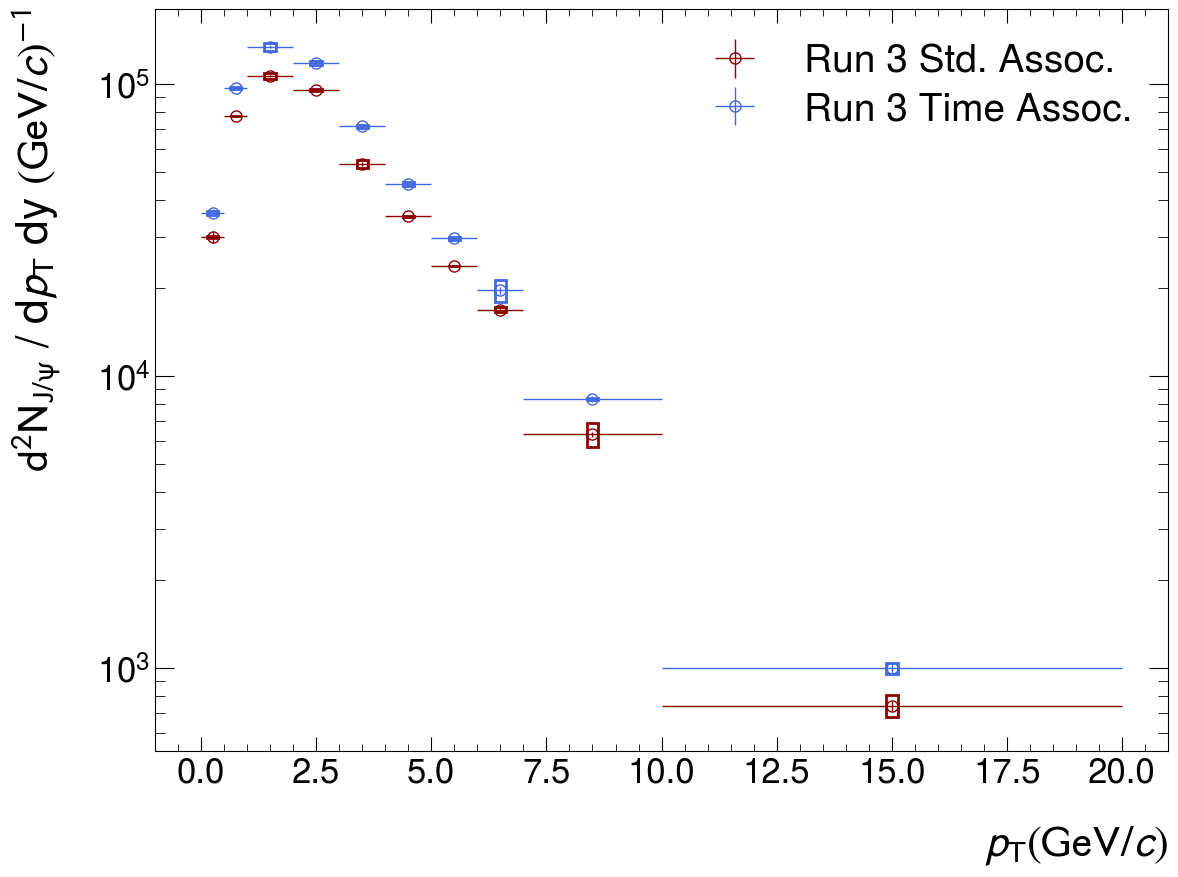

In [11]:
# Raw yield
fig, ax = plt.subplots()
plot_syst(ptStdAssoc, 0.125, rawYieldStdAssocVsPt, systRawYieldStdAssocVsPt, ax, 'darkred', 2)
plot_syst(ptTimeAssoc, 0.125, rawYieldTimeAssocVsPt, systRawYieldTimeAssocVsPt, ax, 'royalblue', 2)

# Grafico con barre di errore
plt.errorbar(ptStdAssoc, rawYieldStdAssocVsPt, xerr=errPtStdAssoc, yerr=statRawYieldStdAssocVsPt, fmt='o', color='darkred', ecolor='darkred', markerfacecolor='none', markersize=8, label=r'Run 3 Std. Assoc.')
plt.errorbar(ptTimeAssoc, rawYieldTimeAssocVsPt, xerr=errPtTimeAssoc, yerr=statRawYieldTimeAssocVsPt, fmt='o', color='royalblue', ecolor='royalblue', markerfacecolor='none', markersize=8, label=r'Run 3 Time Assoc.')

# Personalizzazione
plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$d^{2}N_{\rm{J}/\psi}$ / d$\it{p}_{\rm{T}}$ dy $(\rm{GeV}/\it{c})^{-1}$')
#plt.ylim(0, 0.7)
plt.yscale('log')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Mostrare il grafico
plt.show()

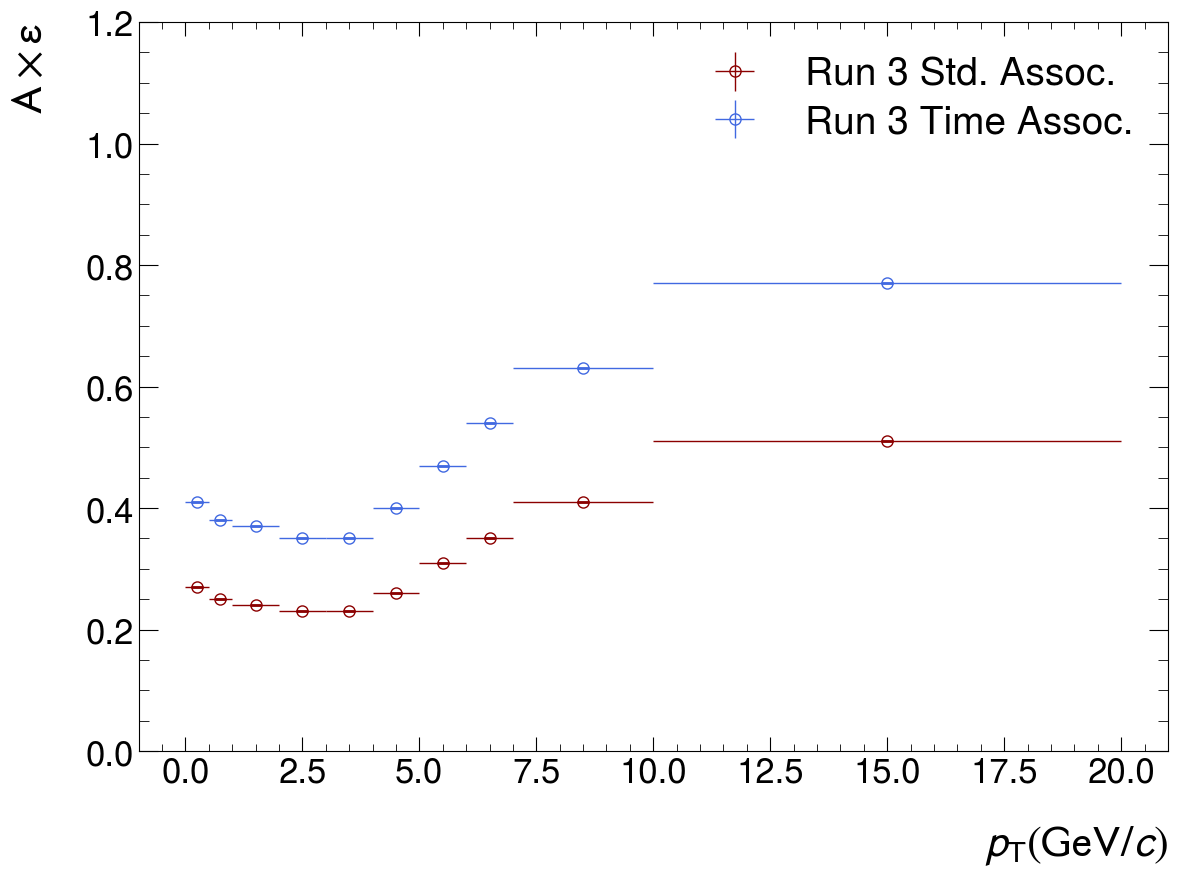

In [12]:
# Axe
fig, ax = plt.subplots()
plot_syst(ptStdAssoc, 0.125, axeStdAssocVsPt, systAxeStdAssocVsPt, ax, 'darkred', 2)
plot_syst(ptTimeAssoc, 0.125, axeTimeAssocVsPt, systAxeTimeAssocVsPt, ax, 'royalblue', 2)

# Grafico con barre di errore
plt.errorbar(ptStdAssoc, axeStdAssocVsPt, xerr=errPtStdAssoc, yerr=statAxeStdAssocVsPt, fmt='o', color='darkred', ecolor='darkred', markerfacecolor='none', markersize=8, label=r'Run 3 Std. Assoc.')
plt.errorbar(ptTimeAssoc, axeTimeAssocVsPt, xerr=errPtTimeAssoc, yerr=statAxeTimeAssocVsPt, fmt='o', color='royalblue', ecolor='royalblue', markerfacecolor='none', markersize=8, label=r'Run 3 Time Assoc.')

# Personalizzazione
plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$A\times\varepsilon$')
plt.ylim(0, 1.2)
#plt.yscale('log')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Mostrare il grafico
plt.show()

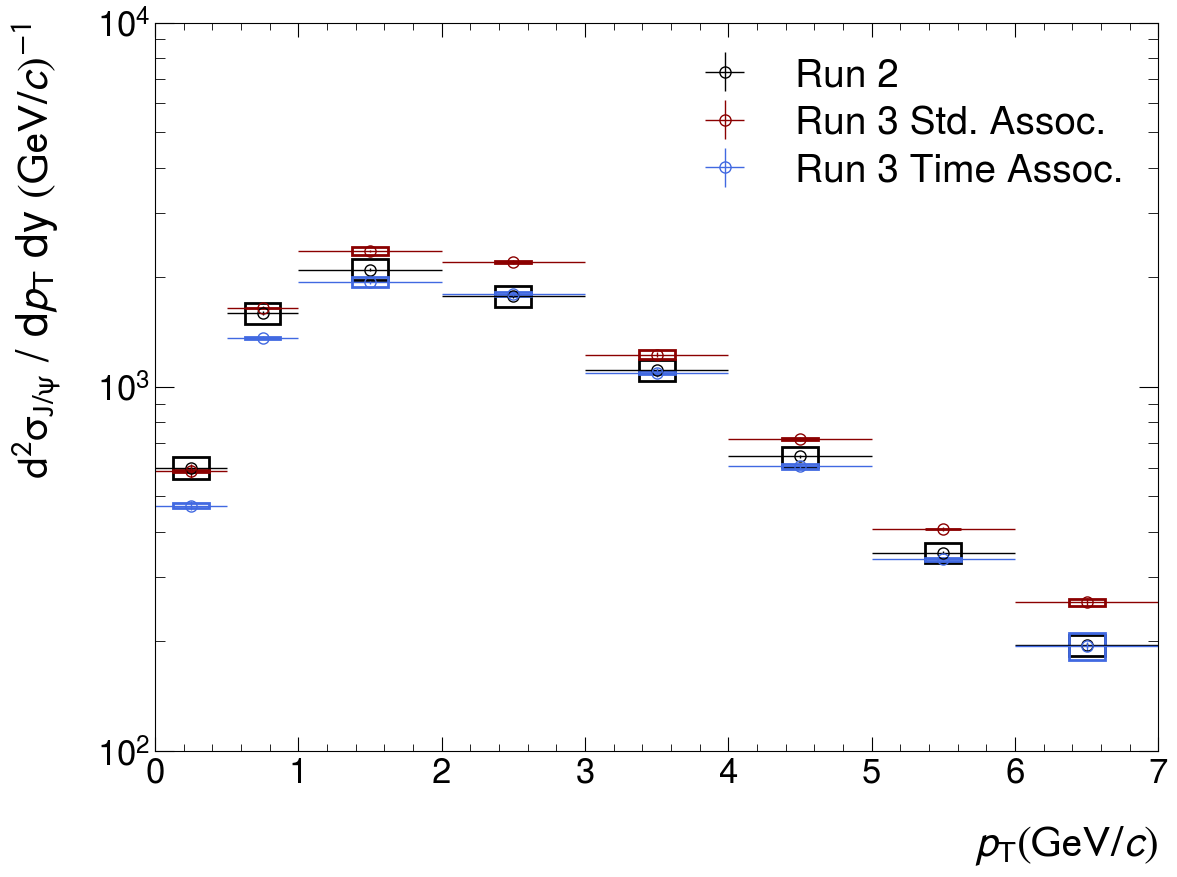

In [17]:
# Cross section
fig, ax = plt.subplots()
plot_syst(ptCenters, 0.125, crossSectionRun2VsPt, systCrossSectionRun2VsPt, ax, 'black', 2)
plot_syst(ptStdAssoc, 0.125, crossSectionStdAssocVsPt, systCrossSectionStdAssocVsPt, ax, 'darkred', 2)
plot_syst(ptTimeAssoc, 0.125, crossSectionTimeAssocVsPt, systCrossSectionTimeAssocVsPt, ax, 'royalblue', 2)

# Grafico con barre di errore
plt.errorbar(ptCenters, crossSectionRun2VsPt, xerr=ptWidths, yerr=statCrossSectionRun2VsPt, fmt='o', color='black', ecolor='black', markerfacecolor='none', markersize=8, label=r'Run 2')
plt.errorbar(ptStdAssoc, crossSectionStdAssocVsPt, xerr=errPtStdAssoc, yerr=statCrossSectionStdAssocVsPt, fmt='o', color='darkred', ecolor='darkred', markerfacecolor='none', markersize=8, label=r'Run 3 Std. Assoc.')
plt.errorbar(ptTimeAssoc, crossSectionTimeAssocVsPt, xerr=errPtTimeAssoc, yerr=statCrossSectionTimeAssocVsPt, fmt='o', color='royalblue', ecolor='royalblue', markerfacecolor='none', markersize=8, label=r'Run 3 Time Assoc.')

# Personalizzazione
plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$d^{2}\sigma_{\rm{J}/\psi}$ / d$\it{p}_{\rm{T}}$ dy $(\rm{GeV}/\it{c})^{-1}$')
plt.xlim(0, 7)
plt.ylim(1e2, 1e4)
plt.yscale('log')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Mostrare il grafico
plt.show()

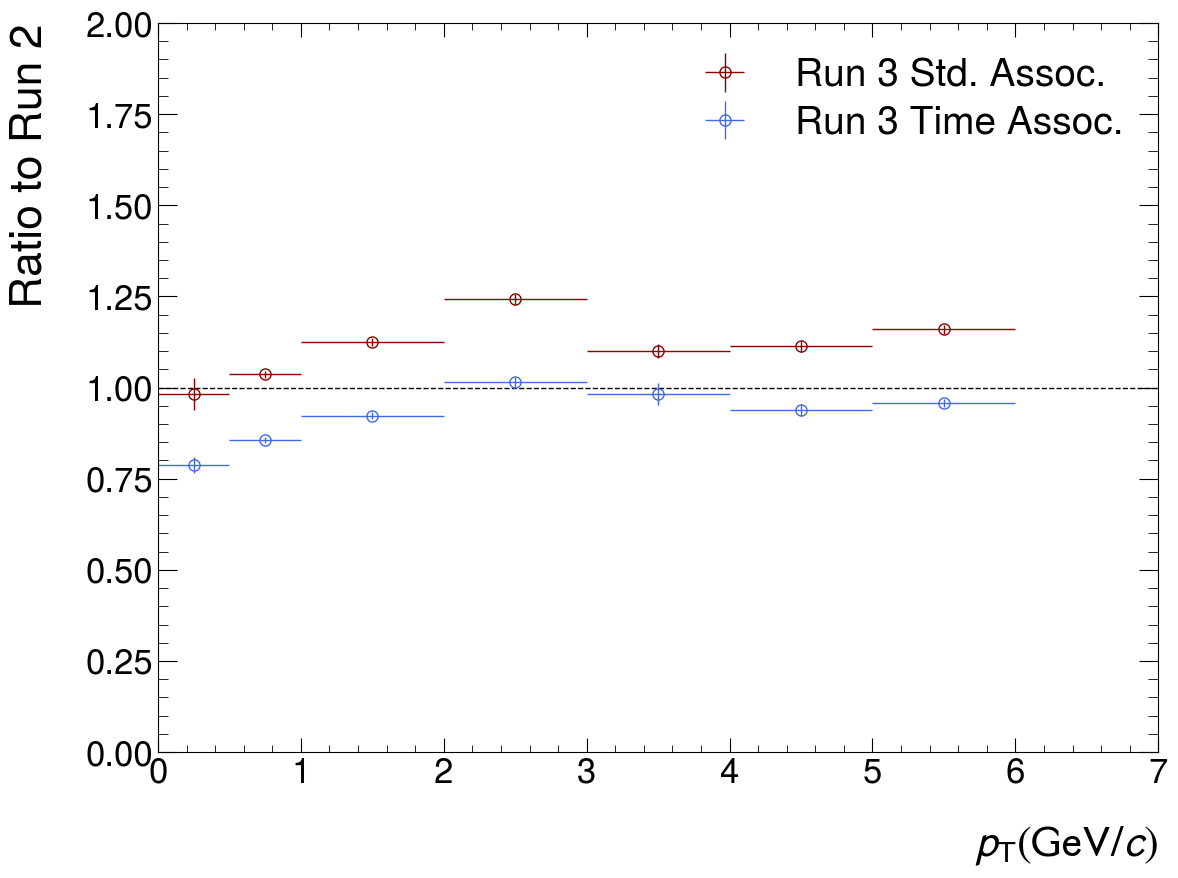

In [31]:
ratioRun3StdAssocToRun2VsPt = crossSectionStdAssocVsPt[:7] / crossSectionRun2VsPt[:7]
statRatioRun3StdAssocToRun2VsPt = ratioRun3StdAssocToRun2VsPt * (statCrossSectionStdAssocVsPt[:7] / crossSectionStdAssocVsPt[:7])
ratioRun3TimeAssocToRun2VsPt = crossSectionTimeAssocVsPt[:7] / crossSectionRun2VsPt[:7]
statRatioRun3TimeAssocToRun2VsPt = ratioRun3TimeAssocToRun2VsPt * (statCrossSectionTimeAssocVsPt[:7] / crossSectionTimeAssocVsPt[:7])

# Grafico con barre di errore
plt.errorbar(ptStdAssoc[:7], ratioRun3StdAssocToRun2VsPt, xerr=errPtStdAssoc[:7], yerr=statRatioRun3StdAssocToRun2VsPt, fmt='o', color='darkred', ecolor='darkred', markerfacecolor='none', markersize=8, label=r'Run 3 Std. Assoc.')
plt.errorbar(ptTimeAssoc[:7], ratioRun3TimeAssocToRun2VsPt, xerr=errPtTimeAssoc[:7], yerr=statRatioRun3TimeAssocToRun2VsPt, fmt='o', color='royalblue', ecolor='royalblue', markerfacecolor='none', markersize=8, label=r'Run 3 Time Assoc.')

# Personalizzazione
plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'Ratio to Run 2')
plt.xlim(0, 7)
plt.ylim(0, 2)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.axhline(y=1., color='black', linestyle='--')

# Mostrare il grafico
plt.show()